Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9275 - loss: 0.2374 - val_accuracy: 0.9857 - val_loss: 0.0480
Epoch 2/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9789 - loss: 0.0693 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 3/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9841 - loss: 0.0507 - val_accuracy: 0.9912 - val_loss: 0.0313
Epoch 4/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9912 - val_loss: 0.0314
Epoch 5/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9908 - val_loss: 0.0333
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0237
Test Accuracy: 99.21%


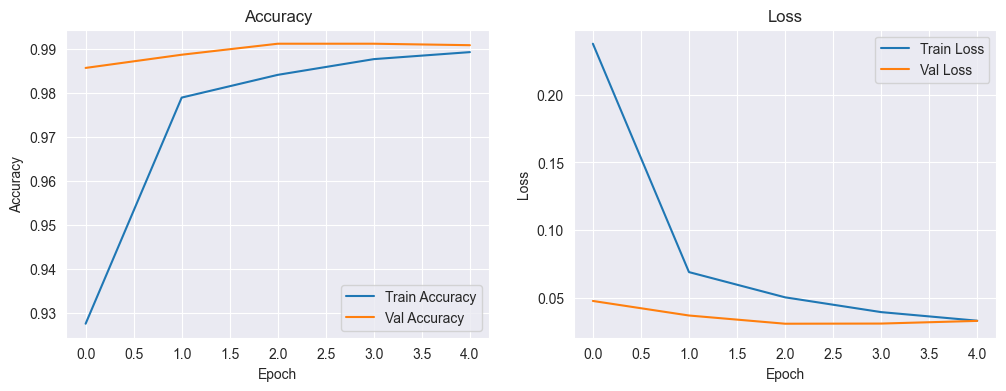

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(42)
X_train = X_train.astype('float32') / 255.0 + np.random.normal(0, 0.01, X_train.shape)  # subtle noise
X_test = X_test.astype('float32') / 255.0 + np.random.normal(0, 0.01, X_test.shape)     # subtle noise

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.35),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0012), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=110)
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()